            Moyenne Parc  Écart-type Parc  Moyenne École  Écart-type École  \
Montréal              46               21             24                11   
Sherbrooke            48                0             16                 0   

            Corrélation Habitant  
Montréal                     621  
Sherbrooke                   426  


<AxesSubplot:>

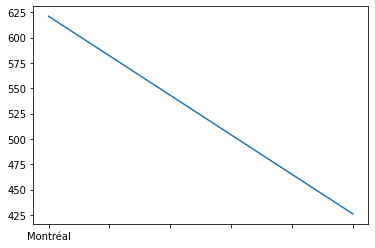

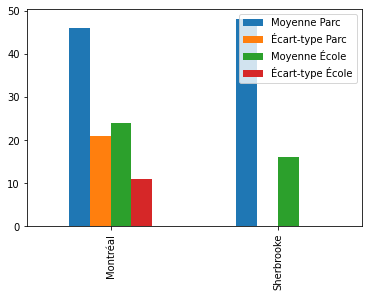

In [1]:
# Ouvrir et lire les fichiers csv
import pandas
import matplotlib.pyplot as plt
import numpy as np
site_interet_csv = pandas.read_csv("Siteintetret_Sherbrooke.csv", delimiter=",")
lieu_interet_csv = pandas.read_csv("lieuxintéret_Montéral.csv", delimiter=",")
arrondissement = pandas.read_csv("Arrondissements_Sherbrooke.csv", delimiter=",")
population = pandas.read_csv("Populations.csv", delimiter=",")

###                 ANALYSE DONNÉES                 ###

#####       MONTRÉAL          #####

# Sélectionner les colonnes de nom, de type et d'arrondissment des lieux d'intérêts de Montréal
lieu_interet = lieu_interet_csv[["Type","Arrondissement"]]


# Sélectionner que les parcs de Montréal
parc_montreal = lieu_interet[lieu_interet["Type"] == "Parc"]

# Calcul des statistiques des écoles (hors études supérieurs) par arrondissements
a = (parc_montreal.groupby("Arrondissement").count())
stat_parc_montreal = a.describe()


#Calcul Moyenne
moyenne_parc_montreal = stat_parc_montreal['Type']['mean']

#Calcul Écart-Type
et_parc_montreal = stat_parc_montreal['Type']['std']


# Sélectionner que les écoles (hors études supérieurs) de Montréal
ecole_montreal = lieu_interet[lieu_interet["Type"] == "École primaire"],lieu_interet[lieu_interet["Type"] == "École secondaire et professionnelle"]
liste_primaire = (ecole_montreal[0].groupby("Arrondissement").count())
liste_secondaire =(ecole_montreal[1].groupby("Arrondissement").count())
liste_ecole_arrondissement = liste_primaire + liste_secondaire
liste_ecole_arrondissement['Type'][3] = 3


# Calcul des statistiques des écoles (hors études supérieurs) par arrondissements
stat_ecole_montreal = liste_ecole_arrondissement.describe()

#Calcul Moyenne
somme_ecole_montreal = len(ecole_montreal[0]) + len(ecole_montreal[1])
moyenne_ecole_montreal = stat_ecole_montreal['Type']['mean']

#Calcul Écart-Type
et_ecole_montreal = stat_ecole_montreal['Type']['std']



# Calcul de la corrélation entre les sites d'intérêts et les habitants de la Ville de Sherbrooke
somme_lieu_interet = len(lieu_interet_csv.groupby("ID").count())
somme_population_montreal = population.loc[population["Ville"] == "Montréal","Population 2021"]
correlation_montreal = somme_population_montreal / somme_lieu_interet



#####       SHERBROOKE          #####

# Sélectionner les colonnes de nom et de type des sites d'intérêts de Sherbrooke
site_interet = site_interet_csv[["NOM","TYPE"]]


# Sélectionner que les parcs de Sherbrooke
parc_sherbrooke = site_interet[site_interet["TYPE"] == 9]

# Calcul de la moyenne de parc par arrondissements
moyenne_parc_sherbrooke = len(parc_sherbrooke) / len(arrondissement)

#Aucune donnée sur les parcs par arrondissements, donc impossible de calculer l'Écart-Type. La valeur 0  a été attribué
#Calcul Écart-Type
et_parc_sherbrooke = np.std(moyenne_parc_sherbrooke)

# Sélectionner que les écoles (hors études supérieurs) de Sherbrooke
ecole_sherbrooke = site_interet[site_interet["TYPE"] == 14],site_interet[site_interet["TYPE"] == 15],site_interet[site_interet["TYPE"] == 18],site_interet[site_interet["TYPE"] == 19]

# Calcul des statistiques des écoles (hors études supérieurs) par arrondissements
#Calcul Moyenne
somme_ecole_sherbrooke = len(ecole_sherbrooke[0]) + len(ecole_sherbrooke[1]) + len(ecole_sherbrooke[2]) + len(ecole_sherbrooke[3])

moyenne_ecole_sherbrooke = somme_ecole_sherbrooke / len(arrondissement)

#Aucune donnée sur les écoles par arrondissements, donc impossible de calculer l'Écart-Type. La valeur 0  a été attribué
#Calcul Écart-Type
et_ecole_sherbrooke = np.std(moyenne_ecole_sherbrooke)

# Calcul de la corrélation entre les sites d'intérêts et les habitants de la Ville de Sherbrooke
somme_site_interet = len(site_interet.groupby("NOM").count())
somme_population_sherbrooke = population.loc[population["Ville"] == "Sherbrooke","Population 2021"]
correlation_sherbrooke = somme_population_sherbrooke / somme_site_interet



###                 VISUALISATION DONNÉES                 ###

#####       NOUVELLE MATRICE RASSEMBLANT LES STATISTIQUES          #####

#nouvelle_matrice des statistiques de Montréal

moyenne_parc_montreal = round(moyenne_parc_montreal)
et_parc_montreal = round(et_parc_montreal)
moyenne_ecole_montreal = round(moyenne_ecole_montreal)
et_ecole_montreal = round(et_ecole_montreal)
correlation_montreal = round(correlation_montreal[0])

nouvelle_matrice_montreal = [
    moyenne_parc_montreal,
    et_parc_montreal,
    moyenne_ecole_montreal,
    et_ecole_montreal,
    correlation_montreal
]


#nouvelle_matrice des statistiques de Sherbrooke
moyenne_parc_sherbrooke = round(moyenne_parc_sherbrooke)
et_parc_sherbrooke = round(et_parc_sherbrooke)
moyenne_ecole_sherbrooke = round(moyenne_ecole_sherbrooke)
et_ecole_sherbrooke = round(et_ecole_sherbrooke)
correlation_sherbrooke = round(correlation_sherbrooke[1])

nouvelle_matrice_sherbrooke = [
    moyenne_parc_sherbrooke,
    et_parc_sherbrooke,
    moyenne_ecole_sherbrooke,
    et_ecole_sherbrooke,
    correlation_sherbrooke
]


#####       TABLEAU ET DIAGRAMME AVEC NOUVELLE MATRICE          #####

#nouvelle_matrice des statistiques des deux villes
nouvelle_matrice_finale =pandas.DataFrame([
    nouvelle_matrice_montreal,
    nouvelle_matrice_sherbrooke
    ],
    columns = ['Moyenne Parc','Écart-type Parc', 'Moyenne École','Écart-type École','Corrélation Habitant'],
    index = ['Montréal', 'Sherbrooke'])

print(nouvelle_matrice_finale)

#code pour afficher un diagramme sur Jupyter
nouvelle_matrice_finale['Corrélation Habitant'].plot(kind="line")
del nouvelle_matrice_finale['Corrélation Habitant']
nouvelle_matrice_finale.plot(kind="bar")
